# Домашняя работа №1. Часть №1. Первичный анализ данных фондового рынка.

 <b>рынок:</b> Бразилия<br>
 <b>период:</b> 2018 год

Выполнили студенты группы <b>22ПМИ-2</b>

Коршунова Анастасия, <br>
Деркач Алёна, <br>
Бовырин Денис

<b> 1. Собрать информацию по указанному фондовому рынку (сколько активов, когда начались торги, основные компании…). Собрать данные по дневным ценам активов (акций) на заданном фондовом рынке за указанный период (1 год, примерно 250 наблюдений). 

Мы нашли информацию о бразильских компаниях за 2018 год на сайте https://www.marketwatch.com/ и выделили 10 основных:
1.  Banco Bradesco                      
2.  Bicicletas Monark
3.  Braskem
4.  Centrais Eletricas Brasileiras
5.  Companhia Siderurgica Nacional Ord
6.  Cyrela Brazil Realty
7.  Embraer S.A.
8.  GOL Linhas Aereas Inteligentes
9.  Itau Unibanco Holding S.A. Ord
10. Light S/A Ord

Все данные были записаны в excel файле Data.xlsx. В файле указаны дата, отрытие/закрытие торгов, самое высокое/низкое значение и объем.

<b>2. Преобразовать данные по ценам в данные по доходностям (используйте логарифмическую доходность). Вычислите оценки ожидаемых доходностей и стандартных отклонений и постройте «карту» активов в системе координат (σ, E).

В этой же таблице мы добавили столбец с преобразованием данных по ценам в данные по доходностям (Return и log_retern). Столбец 'Return' был добавлен для наглядности и проверки данных. В дальнейшем для подсчетов будет использоваться только log_return.

In [ ]:
#  Функция для вычисления стандартного отклонения
def find_risk(data):
    risk = data['log_return'].std()
    return risk

#  Функция для вычисления ожидаемой доходности
def find_expected_return(data):
    expected_return = data['log_return'].mean()
    return expected_return

In [ ]:
expected_returns = {}
risks = {}

#  Находим ожидаемую доходность и стандартное отклонение для каждого актива и записываем в словари
for sheet, data in data_sheets.items():
    expected_returns[sheet] = find_expected_return(data)
    risks[sheet] = find_risk(data)

Два актива (Banco Bradesco и Braskem) имеют очень близкие значения (выделено зелёным), поэтому на графике видно только 9 активов.

![Карта активов-2.png](<attachment:Карта активов-2.png>)
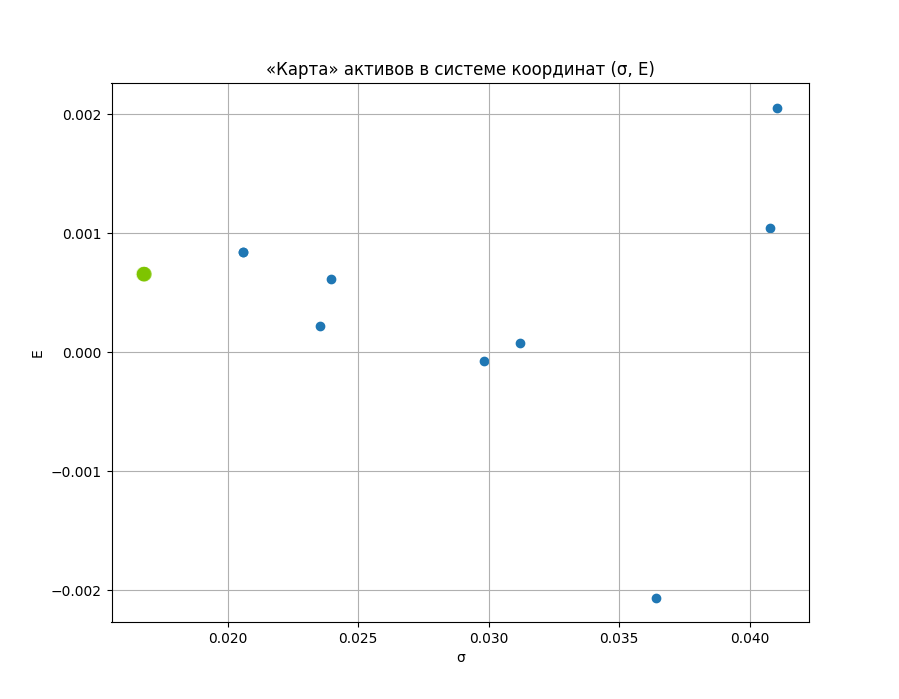

<b>3. Найдите все Парето оптимальные активы (те активы, характеристики которых нельзя улучшить сразу по двум критериям). Отметьте их на карте активов.



In [ ]:
#  Поиск Парето оптимальных активов

optimal_assets = []

for i, point_1 in risk_and_return.iterrows():
    flag = False
    for j, point_2 in risk_and_return.iterrows():
        if (point_2['E'] >= point_1['E'] and point_2['σ'] < point_1['σ']) or (
            point_2['E'] > point_1['E'] and point_2['σ'] <= point_1['σ']):
            flag = True
            break
    if not flag:
        optimal_assets.append(point_1)

optimal_assets = pd.DataFrame(optimal_assets)

Все Парето оптимальные активы выделены красным.

![Парето оптимальные активы.png](<attachment:Парето оптимальные активы.png>)
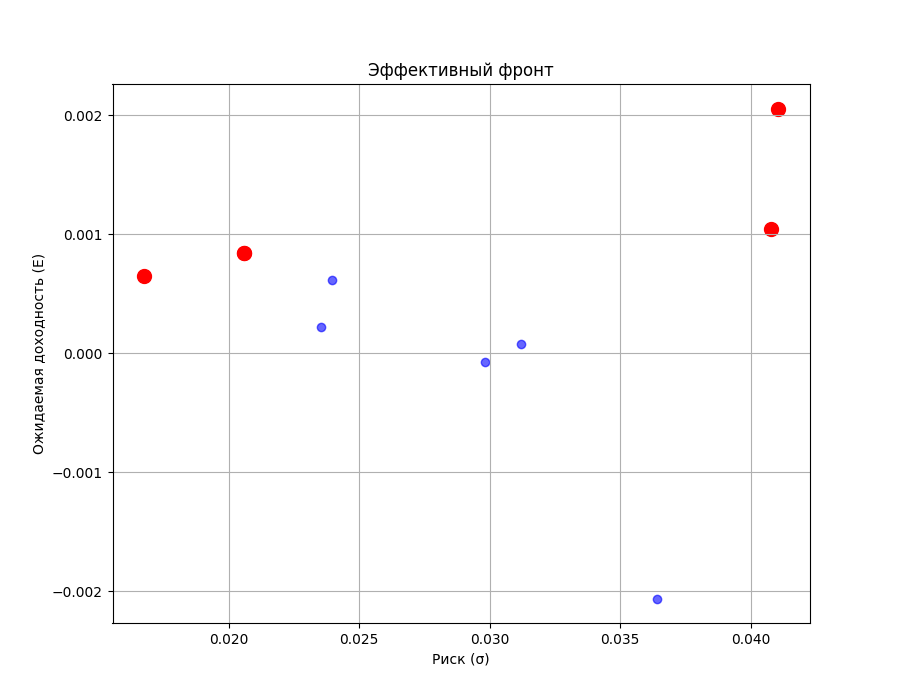

<b>4. Задайте уровень доверия  0,95 и оцените VaR (Value at Risk = Сумма под Риском,  Потери = - Доходности) для Парето-оптимальных активов вашего рынка. Какой из активов наиболее предпочтителен по этой характеристике?  Где он расположен на карте активов? 

<b>5. Задайте уровень доверия  0,95 и оцените CVaR (Conditional Value at Risk = Условная Сумма под Риском, Потери = - Доходности) для Парето-оптимальных активов вашего рынка. Какой из активов наиболее предпочтителен по этой характеристике?  Где он расположен на карте активов? Сравните с результатом предыдущего пункта.

<b>6. Выберите несколько интересных (значимых)  активов вашего рынка.   Можно ли считать наблюдаемые доходности конкретного актива повторной выборкой из некоторого распределения (белый шум)?  Поищите научные подходы к ответу на этот вопрос (проверка гипотезы о случайности, Ивченко Г.И. Медведев Ю.И. Введение в математическую статистику).

<b>7. Выберите несколько интересных (значимых)  активов рынка из разных производственных секторов.   В предположении, что наблюдаемые доходности являются повторной выборкой из некоторого распределения исследовать (выборочно) распределения доходностей выбранных активов. Можно ли считать, что распределения доходностей подчиняются нормальному закону  распределения? 

<b>8. Если в п.7 ответ отрицательный, какие другие законы распределения доходностей соответствуют данным наблюдений?

<b>9. Попробуйте найти что-нибудь интересное (необычное) на вашем рынке. Используйте любые известные вам методы анализа данных. 